In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
train = pd.read_csv('bigmart_train.csv')

In [3]:
test = pd.read_csv('bigmart_test.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
import seaborn as sns

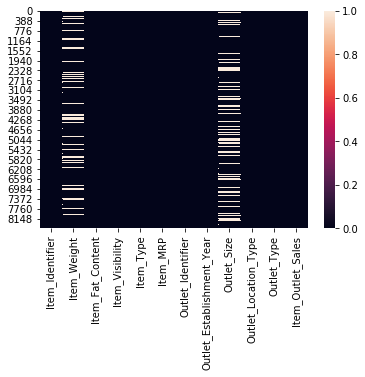

In [7]:
sns.heatmap(train.isnull())

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


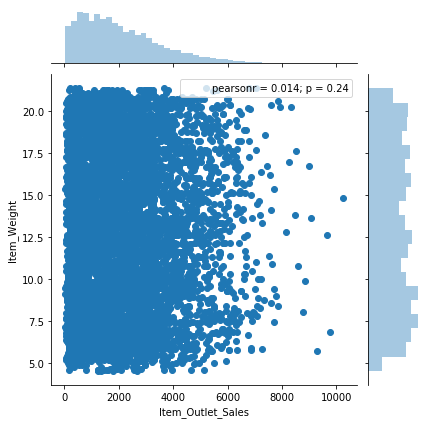

In [10]:
sns.jointplot(x='Item_Outlet_Sales',y='Item_Weight', data=train)

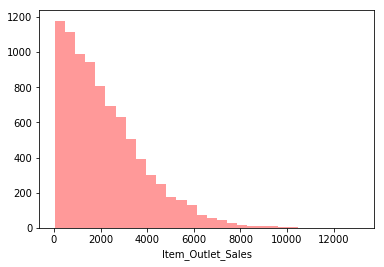

In [13]:
sns.distplot(train['Item_Outlet_Sales'],bins=30, kde=False, color= 'red')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

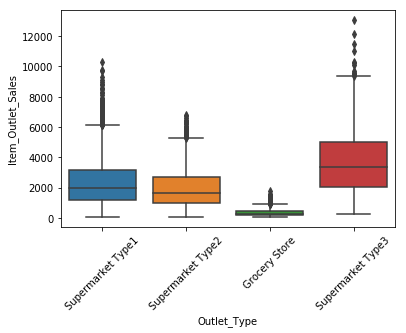

In [16]:
sns.boxplot(x='Outlet_Type', y = 'Item_Outlet_Sales', data=train)
plt.xticks(rotation=45)

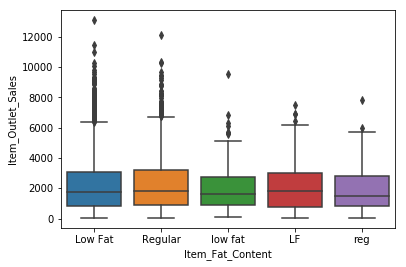

In [17]:
sns.boxplot(x='Item_Fat_Content', y = 'Item_Outlet_Sales', data=train)

In [21]:
train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [23]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

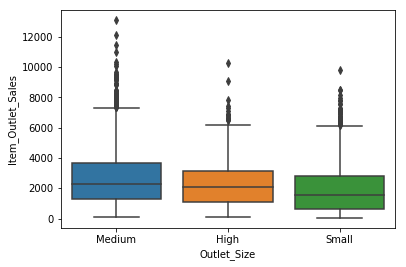

In [24]:
sns.boxplot(x='Outlet_Size', y = 'Item_Outlet_Sales', data=train)

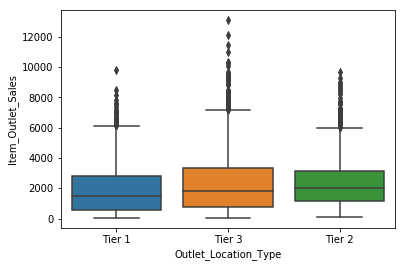

In [25]:
sns.boxplot(x='Outlet_Location_Type', y = 'Item_Outlet_Sales', data=train)

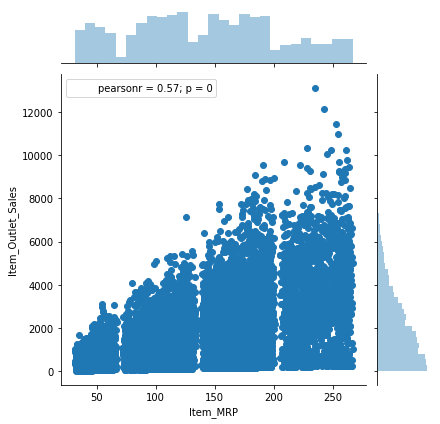

In [26]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales', data=train)

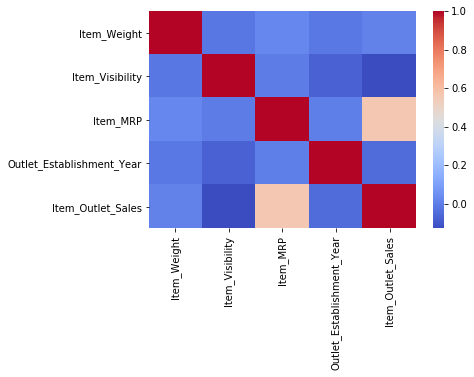

In [30]:
sns.heatmap(train.corr(), cmap='coolwarm')

In [37]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [41]:
train['Outlet_Size'].fillna(value='FILL')

0       Medium
1       Medium
2       Medium
3         FILL
4         High
5       Medium
6         High
7       Medium
8         FILL
9         FILL
10      Medium
11       Small
12      Medium
13       Small
14        High
15       Small
16      Medium
17      Medium
18      Medium
19       Small
20        High
21      Medium
22       Small
23       Small
24       Small
25        FILL
26       Small
27        High
28        FILL
29       Small
         ...  
8493      FILL
8494      FILL
8495     Small
8496      FILL
8497     Small
8498    Medium
8499     Small
8500      FILL
8501      FILL
8502      FILL
8503     Small
8504    Medium
8505    Medium
8506    Medium
8507     Small
8508      FILL
8509      FILL
8510     Small
8511    Medium
8512      High
8513     Small
8514      FILL
8515    Medium
8516    Medium
8517     Small
8518      High
8519      FILL
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [44]:
train['Outlet_Size_new']=train['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [58]:
train['Outlet_Size']=train['Outlet_Size'].map({'Small':0,'Medium':1,'High':2})

In [61]:
train['Outlet_Size_new'].fillna(value='1')

0       1
1       1
2       1
3       1
4       2
5       1
6       2
7       1
8       1
9       1
10      1
11      0
12      1
13      0
14      2
15      0
16      1
17      1
18      1
19      0
20      2
21      1
22      0
23      0
24      0
25      1
26      0
27      2
28      1
29      0
       ..
8493    1
8494    1
8495    0
8496    1
8497    0
8498    1
8499    0
8500    1
8501    1
8502    1
8503    0
8504    1
8505    1
8506    1
8507    0
8508    1
8509    1
8510    0
8511    1
8512    2
8513    0
8514    1
8515    1
8516    1
8517    0
8518    2
8519    1
8520    0
8521    1
8522    0
Name: Outlet_Size_new, Length: 8523, dtype: object

In [62]:
df = pd.DataFrame(train)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,NaN,Tier 1,Supermarket Type1,3735.1380,1.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,NaN,Tier 3,Supermarket Type2,443.4228,1.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,NaN,Tier 1,Supermarket Type1,2097.2700,1.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,NaN,Tier 3,Supermarket Type1,994.7052,2.0


In [67]:
df['Outlet_Size_new'] = df['Outlet_Size_new'].fillna(value='1')

In [82]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Size_new
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,1
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,2


In [70]:
df = df.drop(['Outlet_Size'],axis=1)

In [73]:
df['Item_Weight'] = df['Item_Weight'].fillna(value =df['Item_Weight'].mean() )

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
Outlet_Size_new              8523 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


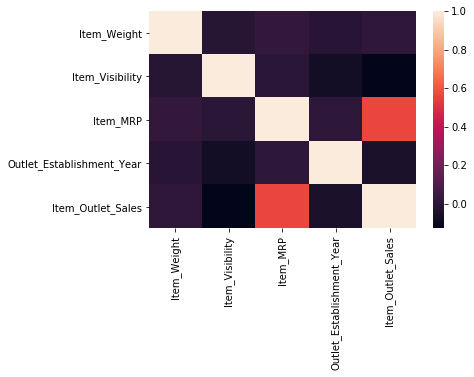

In [76]:
sns.heatmap(df.corr())

In [77]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

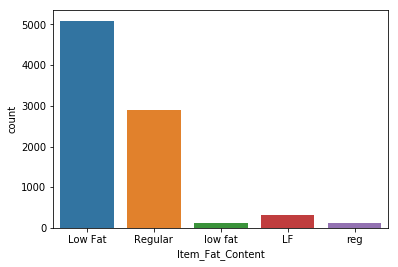

In [79]:
sns.countplot(df['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

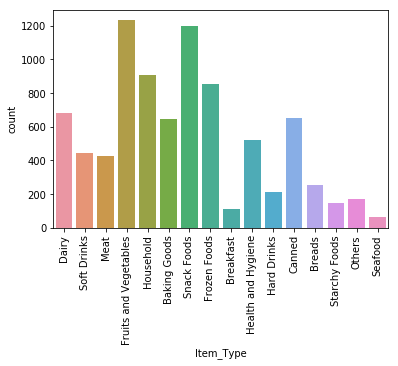

In [81]:
sns.countplot(df['Item_Type'])
plt.xticks(rotation=90)

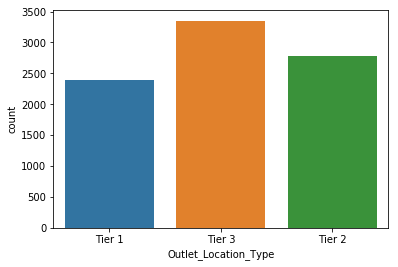

In [83]:
sns.countplot(df['Outlet_Location_Type'])

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

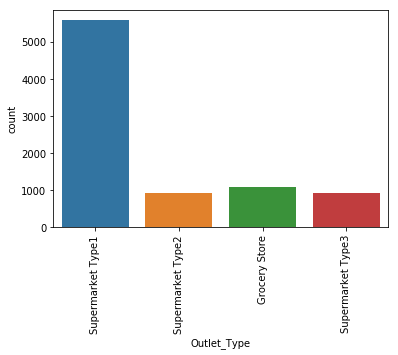

In [85]:
sns.countplot(df['Outlet_Type'])
plt.xticks(rotation=90)

In [86]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [95]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

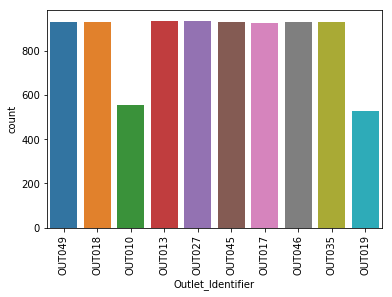

In [97]:
sns.countplot(df['Outlet_Identifier'])
plt.xticks(rotation=90)


In [98]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [99]:
df = df.drop(['Outlet_Identifier'],axis=1) # NOT NEEDED

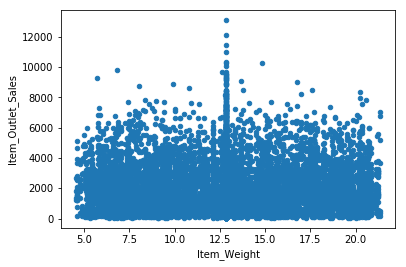

In [105]:
df.plot.scatter(x='Item_Weight', y='Item_Outlet_Sales')

In [107]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [109]:
df['Outlet_type'] = df['Outlet_Type'].map({'Supermarket Type1':1,'Supermarket Type2':2,'Grocery Store':0,'Supermarket Type3':3}).astype(int)

In [163]:
df.head()

,Item_Weight,Item_Fat,Item_Visibility,item,Item_MRP,Outlet_Year,Outlet_Size_new,Outlet_Location_Type,Outlet_type
0,9.30,3,0.016047,3,249.8092,1,1,1,1
1,5.92,2,0.019278,2,48.2692,1,1,3,2
2,17.50,3,0.016760,2,141.6180,1,1,1,1
3,19.20,2,0.000000,5,182.0950,0,1,3,0
4,8.93,3,0.000000,4,53.8614,1,2,3,1


In [111]:
df = df.drop(['Outlet_Type'],axis=1) # NOT NEEDED

In [113]:
df['Outlet_Location_Type'] = df['Outlet_Location_Type'].map({'Tier 1':1,'Tier 2':2,'Tier 3':3}).astype(int)

In [118]:
df['Item_Fat'] = df['Item_Fat_Content'].map({'low fat':0, 'reg':0, 'LF':1 , 'Regular': 2, 'Low Fat':3}).astype(int)

In [120]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [132]:
df['item'] = df['Item_Type'].map({'Seafood':0, 'Breakfast':0,'Hard Drinks':1 , 'Breads':1, 'Starchy Foods':1 , 'Others':1, 'Soft Drinks':2, 'Meat':2, 'Health and Hygiene':2, 'Dairy':3, 'Baking Goods':3, 'Canned':3, 'Household':4, 'Frozen Foods':4, 'Fruits and Vegetables':5, 'Snack Foods':5}) 


In [136]:
df = df.drop(['Item'],axis=1) # NOT NEEDED

In [138]:
X = df['Item_Identifier']

In [140]:
df = df.drop(['Item_Identifier'],axis=1) # NOT NEEDED

In [142]:
df = df.drop(['Item_Type','Item_Fat_Content'],axis=1) # NOT NEEDED

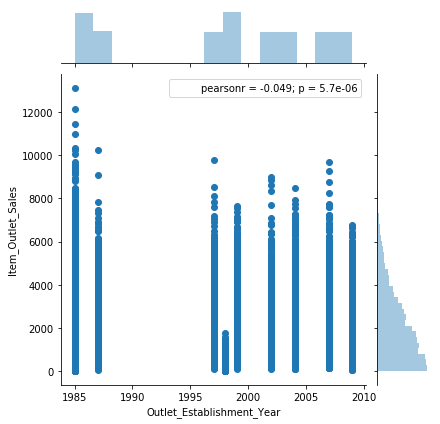

In [146]:
sns.jointplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=df)

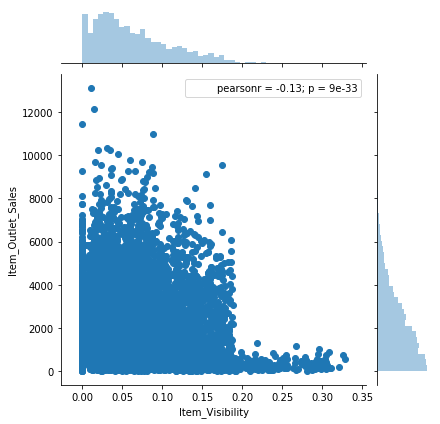

In [147]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales', data=df)

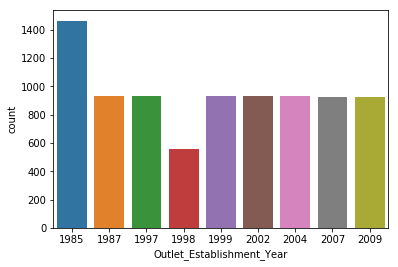

In [148]:
sns.countplot(df['Outlet_Establishment_Year'])

In [151]:
df['Outlet_Year'] = df['Outlet_Establishment_Year'].map({1998:0, 1987:1, 1997:1, 1999:1, 2002:1, 2004:1, 2007:1, 2009:1, 1985:2}).astype(int)

In [153]:
df = df.drop(['Outlet_Establishment_Year'],axis=1) # NOT NEEDED

In [155]:
Y = df['Item_Outlet_Sales'] #TO PREDICT THIS VALUE

In [160]:
df = df[['Item_Weight','Item_Fat','Item_Visibility','item','Item_MRP','Outlet_Year','Outlet_Size_new','Outlet_Location_Type','Outlet_type','Item_Outlet_Sales']]


In [162]:
df = df.drop(['Item_Outlet_Sales'],axis=1) # NOT NEEDED

In [164]:
from sklearn.model_selection import train_test_split

x = pd.DataFrame(df)
y = Y

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [179]:
from sklearn import linear_model
lr = linear_model.LinearRegression()


In [181]:
model = lr.fit(X_train, Y_train)

In [182]:
print("Model score :\n", model.score(X_test,Y_test))

Model score :
 0.519952389039


In [183]:
pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(Y_test, pred))


RMSE is: 
 1289702.54109


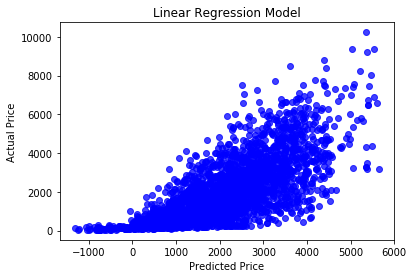

In [184]:
actual_values = Y_test
plt.scatter(pred, actual_values,alpha=.75,color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [193]:

x = pd.DataFrame(df)
y = Y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [194]:
lre = linear_model.LinearRegression()
model = lre.fit(x_train, y_train)

In [195]:
print("Model score :\n", model.score(x_test,y_test))

Model score :
 0.511287308466


In [196]:
predi = model.predict(x_test)

from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predi))


RMSE is: 
 1367213.81198
